# Covid 19 prediction

In [1]:
#importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make a dataframe 'df' out of covid_19_india.csv dataset.

In [2]:
df = pd.read_csv("covid_19_india.csv")
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Unnamed: 9
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0,NaN
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,NaN
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
4597,4598.0,28/07/20,8:00 AM,Tripura,-,-,2467.0,17.0,4049.0,NaN
4598,4599.0,28/07/20,8:00 AM,Uttarakhand,-,-,3675.0,66.0,6328.0,NaN
4599,4600.0,28/07/20,8:00 AM,Uttar Pradesh,-,-,42833.0,1456.0,70493.0,NaN
4600,4601.0,28/07/20,8:00 AM,West Bengal,-,-,39917.0,1411.0,60830.0,NaN


# Drop the irrelevant columns.

In [3]:
#dropping irrelavant columns and rows containing null values

df.drop("Sno", axis='columns', inplace=True)
df.drop("ConfirmedIndianNational", axis='columns', inplace=True)
df.drop("ConfirmedForeignNational", axis='columns', inplace=True)
df.drop("Unnamed: 9", axis='columns', inplace=True)
df.dropna(axis='rows', inplace=True)
df

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,0.0,0.0,1.0
1,31/01/20,6:00 PM,Kerala,0.0,0.0,1.0
2,01/02/20,6:00 PM,Kerala,0.0,0.0,2.0
3,02/02/20,6:00 PM,Kerala,0.0,0.0,3.0
4,03/02/20,6:00 PM,Kerala,0.0,0.0,3.0
...,...,...,...,...,...,...
4596,28/07/20,8:00 AM,Telengana,42909.0,480.0,57142.0
4597,28/07/20,8:00 AM,Tripura,2467.0,17.0,4049.0
4598,28/07/20,8:00 AM,Uttarakhand,3675.0,66.0,6328.0
4599,28/07/20,8:00 AM,Uttar Pradesh,42833.0,1456.0,70493.0


# Find the active patients and add a column 'Active' to the dataframe.

In [4]:
#A new column Active is being created by the formula Active = Cofirmed - Cured - Deaths

df["Active"] = df["Confirmed"] - df["Cured"] - df["Deaths"]
df

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,30/01/20,6:00 PM,Kerala,0.0,0.0,1.0,1.0
1,31/01/20,6:00 PM,Kerala,0.0,0.0,1.0,1.0
2,01/02/20,6:00 PM,Kerala,0.0,0.0,2.0,2.0
3,02/02/20,6:00 PM,Kerala,0.0,0.0,3.0,3.0
4,03/02/20,6:00 PM,Kerala,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...
4596,28/07/20,8:00 AM,Telengana,42909.0,480.0,57142.0,13753.0
4597,28/07/20,8:00 AM,Tripura,2467.0,17.0,4049.0,1565.0
4598,28/07/20,8:00 AM,Uttarakhand,3675.0,66.0,6328.0,2587.0
4599,28/07/20,8:00 AM,Uttar Pradesh,42833.0,1456.0,70493.0,26204.0


In [5]:
#A new dataframe df1 is created by merging all the repeated values in State/UnionTerritory column
#The remaining columns are added and merged

df1 = df.groupby('State/UnionTerritory').sum()
df1.loc["Telangana"] += df1.loc["Telangana***"] + df1.loc["Telengana"]
df1 = df1.drop(["Telangana***", "Telengana"])
display(df1)

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Andaman and Nicobar Islands,5466.0,1.0,8006.0,2539.0
Andhra Pradesh,716878.0,18691.0,1466367.0,730798.0
Arunachal Pradesh,6181.0,69.0,18446.0,12196.0
Assam,429096.0,1446.0,661851.0,231309.0
Bihar,539437.0,6008.0,833259.0,287814.0
Cases being reassigned to states,0.0,0.0,345565.0,345565.0
Chandigarh,24068.0,499.0,34825.0,10258.0
Chhattisgarh,125536.0,849.0,184428.0,58043.0
Dadar Nagar Haveli,14.0,0.0,186.0,172.0


# State wise COVID stats

In [6]:
cured_df = df1["Cured"]
death_df = df1["Deaths"]
confirm_df = df1["Confirmed"]
active_df = df1["Active"]

# State wise Cured cases

<AxesSubplot:xlabel='State/UnionTerritory'>

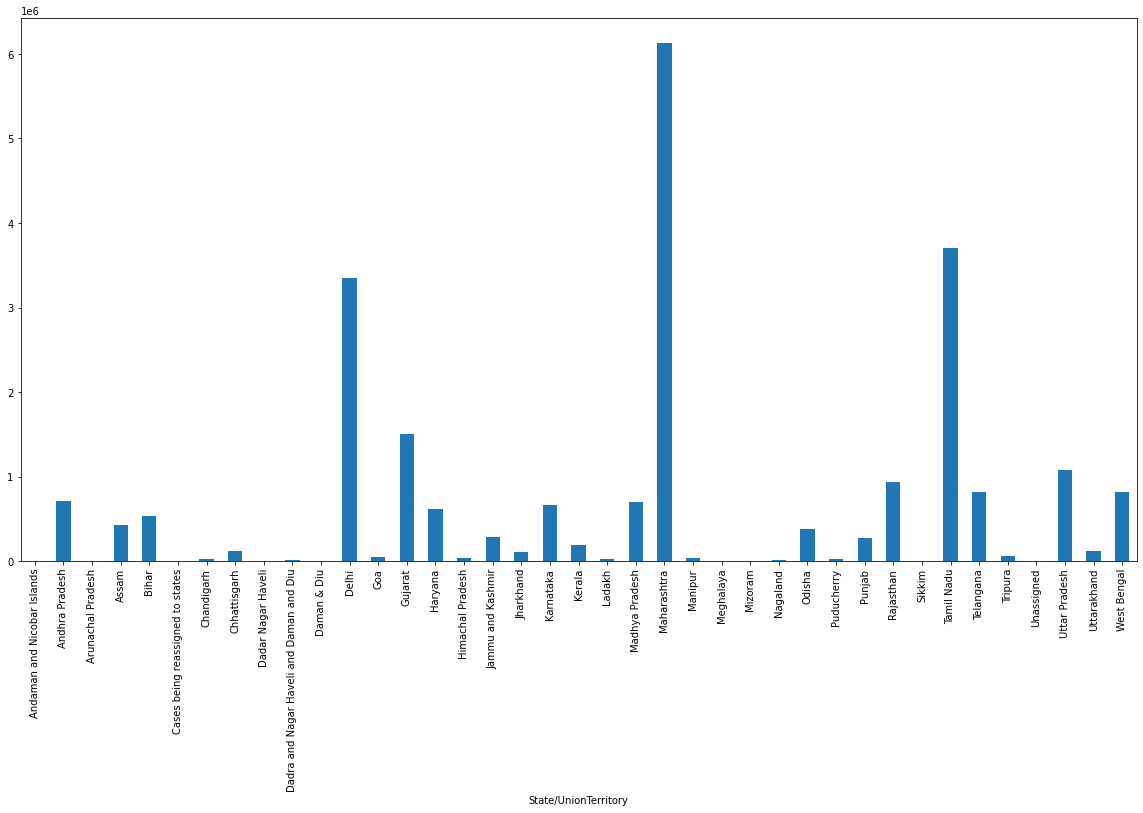

In [7]:
cured_df.plot.bar(figsize=(20,10))

# State wise Deaths

<AxesSubplot:xlabel='State/UnionTerritory'>

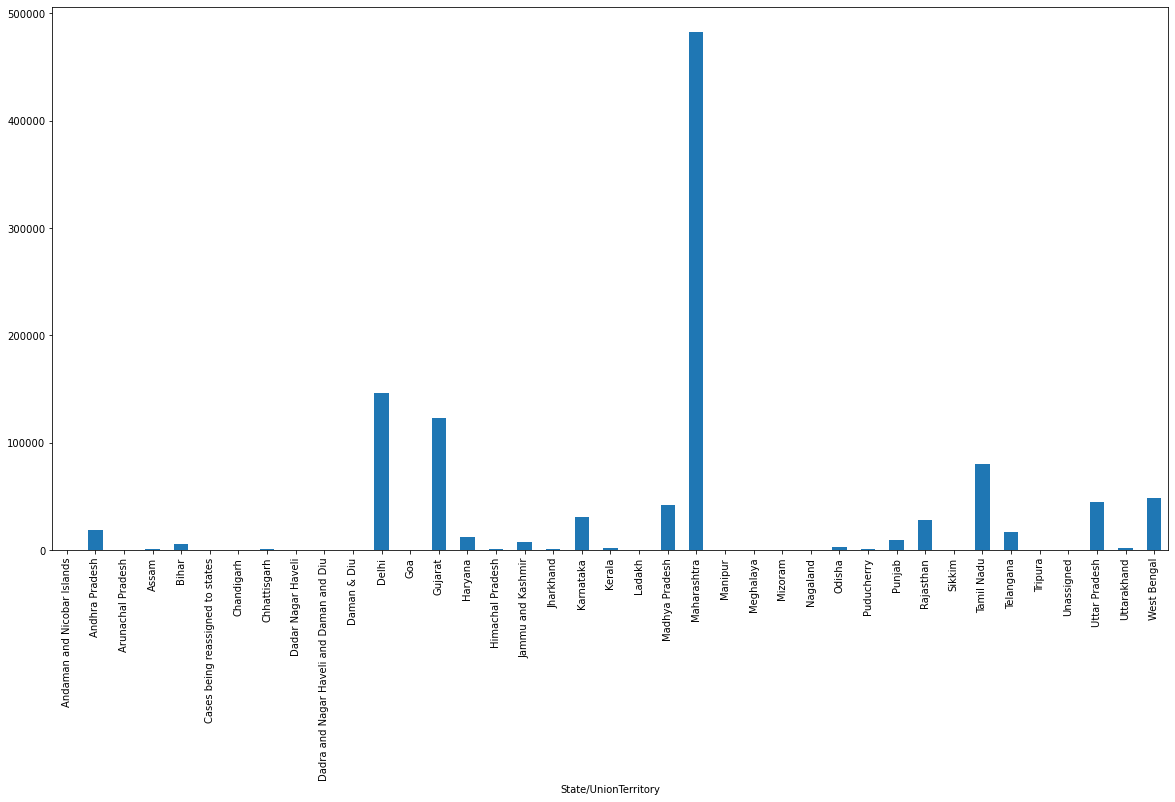

In [8]:
death_df.plot.bar(figsize=(20,10))

# State wise Confirmed cases

<AxesSubplot:xlabel='State/UnionTerritory'>

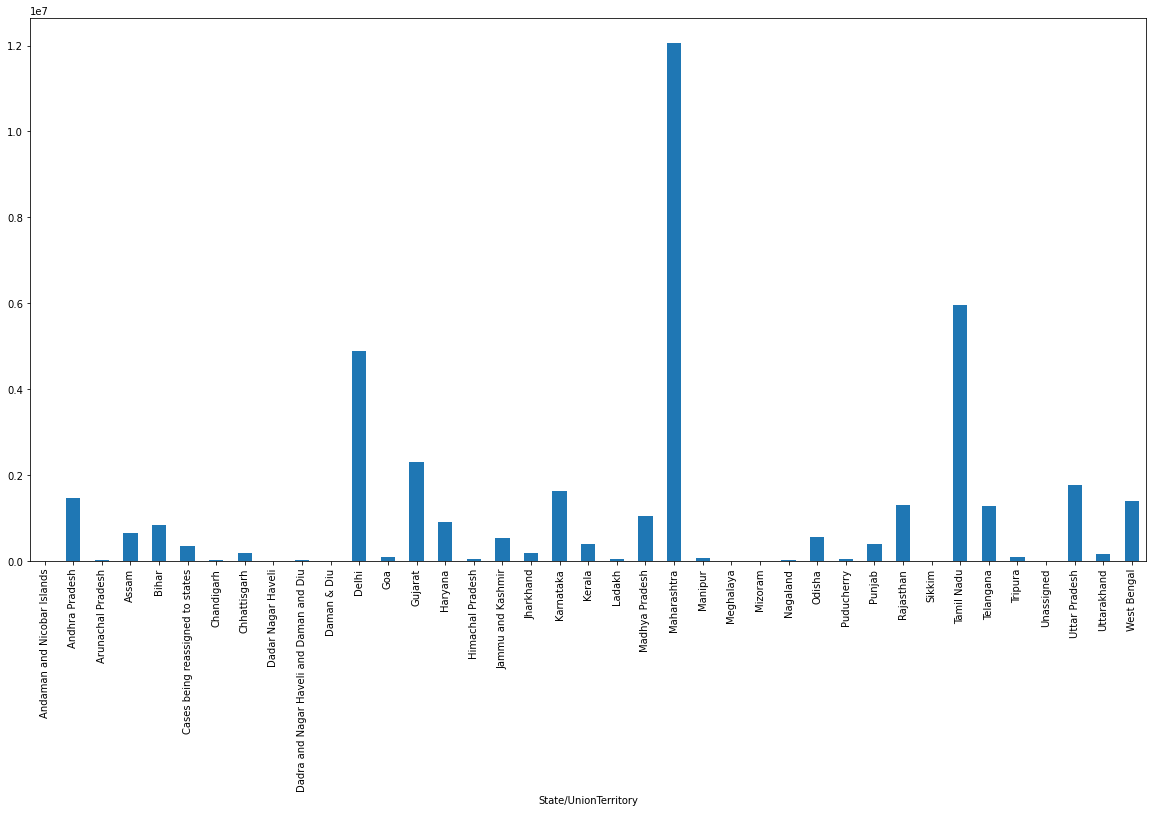

In [9]:
confirm_df.plot.bar(figsize=(20,10))

# State wise Active cases

<AxesSubplot:xlabel='State/UnionTerritory'>

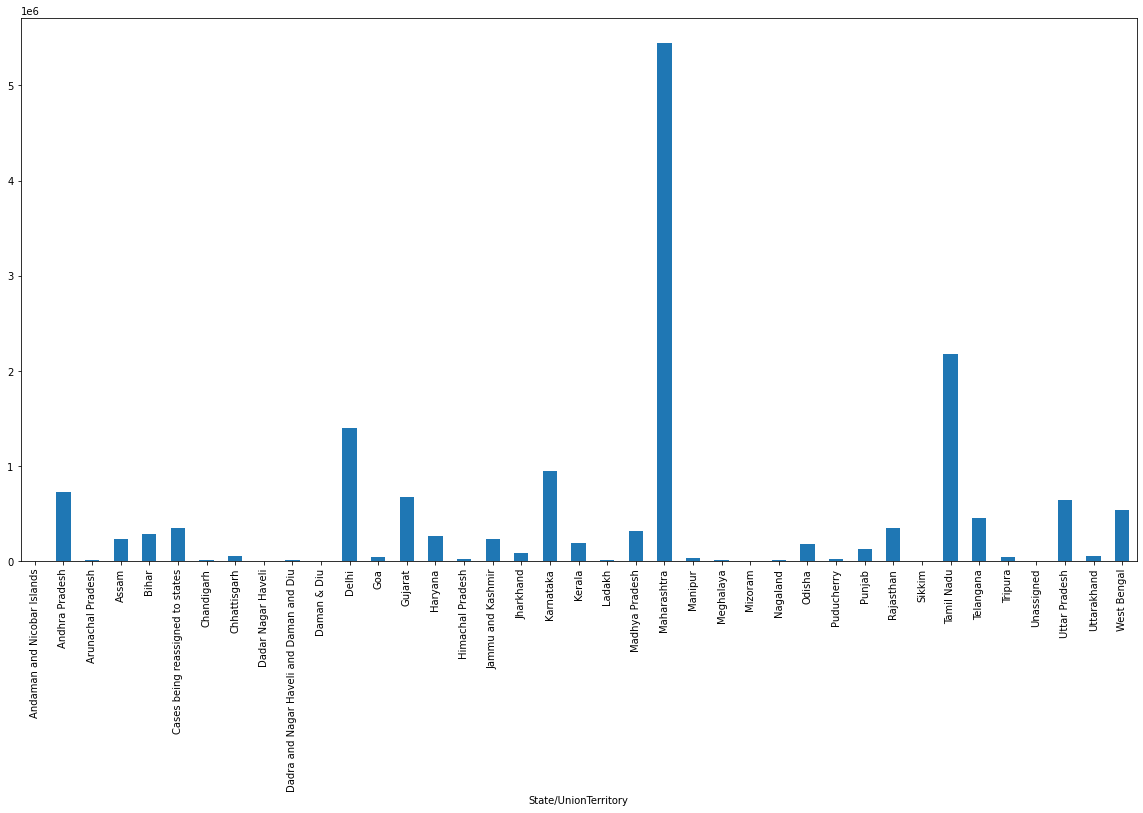

In [10]:
active_df.plot.bar(figsize=(20,10))

# Find the state having current maximum Active patient and number of active patients.

In [11]:
#To find the maximum cases from the dataframe df1

a = df1['Active'].max()
b = df1.loc[df1['Active'] == a]
i = b.index
print("The maximum cases are " + str(a) + " in " + i)

Index(['The maximum cases are 5441638.0 in Maharashtra'], dtype='object', name='State/UnionTerritory')


# Find the state having current minimum Active patient and noof active patients.

In [12]:
#To find the minimum cases from the dataframe df1

a = df1['Active'].min()
b = df1.loc[df1['Active'] == a]
i = b.index
print("The minimum cases are " + str(a) + " in " + i)

Index(['The minimum cases are 2.0 in Daman & Diu'], dtype='object', name='State/UnionTerritory')


In [13]:
#A new dataframe df2 is created by copying the values from df1 to df2

df2 = df1.copy()
display(df2)

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Andaman and Nicobar Islands,5466.0,1.0,8006.0,2539.0
Andhra Pradesh,716878.0,18691.0,1466367.0,730798.0
Arunachal Pradesh,6181.0,69.0,18446.0,12196.0
Assam,429096.0,1446.0,661851.0,231309.0
Bihar,539437.0,6008.0,833259.0,287814.0
Cases being reassigned to states,0.0,0.0,345565.0,345565.0
Chandigarh,24068.0,499.0,34825.0,10258.0
Chhattisgarh,125536.0,849.0,184428.0,58043.0
Dadar Nagar Haveli,14.0,0.0,186.0,172.0


# Find the current Deaths to Cured ratio

In [14]:
#A new column d/c is being created by the formula d/c = Deaths / Cured
#This column computes the ratio of deaths by cured of every state

df2["d/c"] = df2["Deaths"] / df2["Cured"]
df2.dropna(axis='rows', inplace=True)
df2

,Cured,Deaths,Confirmed,Active,d/c
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,5466.0,1.0,8006.0,2539.0,0.000183
Andhra Pradesh,716878.0,18691.0,1466367.0,730798.0,0.026073
Arunachal Pradesh,6181.0,69.0,18446.0,12196.0,0.011163
Assam,429096.0,1446.0,661851.0,231309.0,0.003370
Bihar,539437.0,6008.0,833259.0,287814.0,0.011138
Chandigarh,24068.0,499.0,34825.0,10258.0,0.020733
Chhattisgarh,125536.0,849.0,184428.0,58043.0,0.006763
Dadar Nagar Haveli,14.0,0.0,186.0,172.0,0.000000
Dadra and Nagar Haveli and Daman and Diu,8936.0,28.0,16464.0,7500.0,0.003133


# Find the states having maximum death and cure ratios.

In [15]:
a = df2['d/c'].max()
b = df2.loc[df2['d/c'] == a]
i = b.index
print("The maximum ratio of death and cure is " + str(a) + " in " + i)

Index(['The maximum ratio of death and cure is 0.08156765624089003 in Gujarat'], dtype='object', name='State/UnionTerritory')


# Find the states having minimum death and cure ratios.

In [16]:
a = df2['d/c'].min()
b = df2.loc[df2['d/c'] == a]
i = b.index
print("The minimum ratio of death and cure is " + str(a) + " in " + i)

Index(['The minimum ratio of death and cure is 0.0 in Dadar Nagar Haveli',
       'The minimum ratio of death and cure is 0.0 in Manipur',
       'The minimum ratio of death and cure is 0.0 in Mizoram'],
      dtype='object', name='State/UnionTerritory')


# Plot 'Cured', 'Deaths' and 'Active' parameters over the Date (DELHI)

In [17]:
delhi = df[df['State/UnionTerritory'] == 'Delhi'].copy()
delhi.drop('Confirmed', axis = 1, inplace = True)
delhi

,Date,Time,State/UnionTerritory,Cured,Deaths,Active
34,02/03/20,6:00 PM,Delhi,0.0,0.0,1.0
38,03/03/20,6:00 PM,Delhi,0.0,0.0,1.0
42,04/03/20,6:00 PM,Delhi,0.0,0.0,1.0
45,05/03/20,6:00 PM,Delhi,0.0,0.0,2.0
51,06/03/20,6:00 PM,Delhi,0.0,0.0,3.0
...,...,...,...,...,...,...
4434,24/07/20,8:00 AM,Delhi,109065.0,3745.0,14554.0
4469,25/07/20,8:00 AM,Delhi,110931.0,3777.0,13681.0
4504,26/07/20,8:00 AM,Delhi,113068.0,3806.0,12657.0
4539,27/07/20,8:00 AM,Delhi,114875.0,3827.0,11904.0


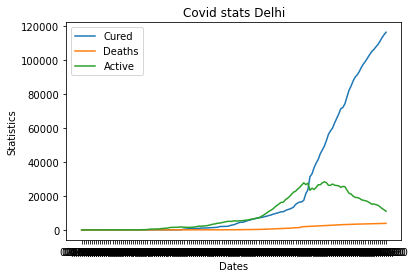

In [18]:
x = delhi['Date']
y = delhi['Cured']
z = delhi['Deaths']
w = delhi['Active']

plt.title("Covid stats Delhi")

plt.plot(x, y, label='Cured')
plt.plot(x, z, label='Deaths')
plt.plot(x, w, label='Active')

plt.xlabel("Dates")
plt.ylabel("Statistics")

plt.legend()


plt.show()

# Plot 'Cured', 'Deaths' and 'Active' parameters over the Date (MAHARASHTRA)

In [19]:
Maharashtra = df[df['State/UnionTerritory'] == 'Maharashtra'].copy()
Maharashtra.drop('Confirmed', axis = 1, inplace = True)
Maharashtra

,Date,Time,State/UnionTerritory,Cured,Deaths,Active
76,09/03/20,6:00 PM,Maharashtra,0.0,0.0,2.0
91,10/03/20,6:00 PM,Maharashtra,0.0,0.0,5.0
97,11/03/20,6:00 PM,Maharashtra,0.0,0.0,2.0
120,12/03/20,6:00 PM,Maharashtra,0.0,0.0,11.0
133,13/03/20,6:00 PM,Maharashtra,0.0,0.0,14.0
...,...,...,...,...,...,...
4445,24/07/20,8:00 AM,Maharashtra,194253.0,12854.0,140395.0
4480,25/07/20,8:00 AM,Maharashtra,199967.0,13132.0,144018.0
4515,26/07/20,8:00 AM,Maharashtra,207194.0,13389.0,145785.0
4550,27/07/20,8:00 AM,Maharashtra,213238.0,13656.0,148905.0


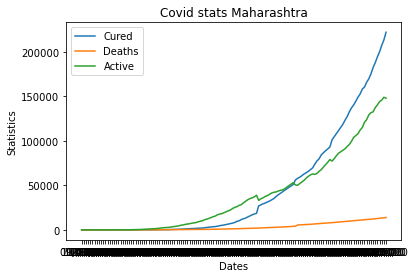

In [20]:
a = Maharashtra['Date']
b = Maharashtra['Cured']
c = Maharashtra['Deaths']
d = Maharashtra['Active']

plt.title("Covid stats Maharashtra")

plt.plot(a, b, label='Cured')
plt.plot(a, c, label='Deaths')
plt.plot(a, d, label='Active')

plt.xlabel("Dates")
plt.ylabel("Statistics")

plt.legend()


plt.show()

Comparing these two plots we can say that Delhi is having more cure rate per day when compared to maharashtra.
The rate of active patients is more in Maharashtra.
The rate of active patients is increasing and then decreasing day by day.
The death rate is constantly increasing in maharashtra.

# Plot pie charts on the last recorded data of Delhi and having labels as 'Active', 'Deaths', 'Cured' 

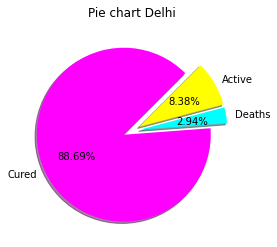

In [21]:
pie_delhi = delhi.iloc[[-1]]

n = ['Cured', 'Deaths', 'Active']
m =[]

for i in range((pie_delhi.shape[0])): 
    m.append(list(pie_delhi.iloc[i, :]))
m = m[0][3:]

colors = ["magenta","cyan","yellow"]
plt.pie(m, labels = n , explode = [0.1,0.1,0.1] , colors = colors, autopct = '%1.2f%%', shadow = True, startangle = 45)
plt.title("Pie chart Delhi")

plt.show()

# Plot pie charts on the last recorded data of Maharashtra having labels as 'Active', 'Deaths', 'Cured' 

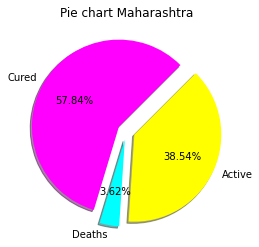

In [22]:
pie_maha = Maharashtra.iloc[[-1]]

N = ['Cured', 'Deaths', 'Active']
M =[] 

for i in range((pie_maha.shape[0])): 
    M.append(list(pie_maha.iloc[i, :]))
M = M[0][3:]

colors = ["magenta","cyan","yellow"]
plt.pie(M, labels = N , explode = [0.1,0.1,0.1] , colors = colors, autopct = '%1.2f%%', shadow = True, startangle = 45)
plt.title("Pie chart Maharashtra")

plt.show()

From the pie charts we cvan say that cure percentage is more in Delhi than Maharashtra.
Active parients are more in Maharashtra.
Deaths are less in Delhi.